In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tabla1=pd.read_csv('fandango_score_comparison.csv')
tabla2=pd.read_csv('fandango_scrape.csv')
tabla2.head()
tabla2=tabla2.values
tabla1.head(n=7)
tabla1=tabla1.values


In [3]:
#    tiempo.append(tabla2[i,0][-5:-1])    #acceder a un string


m=(tabla2[:,3]>30)  # condicion de votos. Es necesario que m sea una lista con true o false para poder eliminar la restriccion 
tabla2=tabla2[m,:]   # Eliminando la restriccion de los  views
[n1,n2]=np.shape(tabla2)


tiempo=[]
for i in np.arange(0,n1):  # recorremos todas las peliculas
    tiempo.append('2015' in tabla2[i,0])   # se concatenan en la lista tiempo si se cumple o no la condicion si esta el '2015'
tabla2=tabla2[tiempo,:]    # Tabla con los dos filtros. Año y views
[n1,n2]=np.shape(tabla2)
print(n1)

190


In [4]:
## Ploting las graficas en porcentajes

porcentaje=[]
for i in np.arange(0,5.5,0.5):
    porcentaje.append(sum((tabla2[:,1] == i)*1)) # Sacando la cantidad de peliculas que tienen x estrellas
porc=np.array(porcentaje)                        # En la grafica de abajo se observa que ninguna pelicula
porc=porc/n1*100                                 # tiene menos de 2 estrellas

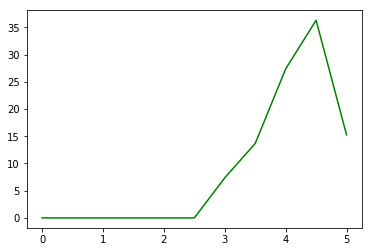

In [5]:
fandando = plt.plot(np.arange(0,5.5,0.5),porc,color="g")

In [6]:
## Intercepcion de los datos
[n1,n2]=np.shape(tabla2)
[l1,l2]=np.shape(tabla1)

print(n1,n2)
print(l1,l2)



190 4
146 22


In [7]:
# Haciendo la intercepcion de las peliculas luego del filtrado
inter=[]
for i in np.arange(0,l1):
    inter.append(tabla1[i,0] in tabla2[:,0])
tabla1=tabla1[inter,:]        # Tabla1 contiene las peliculas luego de hacer la intercepcion
[r1,r2]=np.shape(tabla1)


In [8]:
datos=[]
datos=tabla1[:,13:18]
datos=np.c_[ datos, tabla1[:,6] ]   # Puntajes de las peliculas para cada encuestador (Fandando,METACRITIC,...) 
                                    # Estos son los datos con los que trabajaremos

In [9]:
## Ploting las comparaciones

porcentajex=[]
for j in np.arange(0,6):
    for i in np.arange(0,5.5,0.5):
        porcentajex.append(sum((datos[:,j] == i)*1))    # determinamos por cada encuestador la cantidad de pelicula...
    #porcentajex = np.vstack((porcentajex, x1))         # que tiene cierto puntaje medidos de 0-5
porcx=np.array(porcentajex) 
porcx=porcx/r1*100

In [10]:
porcx = porcx.reshape((6, 11))

In [11]:
porcx

array([[ 0.        , 11.11111111,  7.93650794, 11.9047619 ,  3.17460317,
        11.9047619 ,  9.52380952,  6.34920635, 11.11111111, 13.49206349,
        13.49206349],
       [ 0.        ,  0.        ,  3.17460317,  9.52380952,  7.93650794,
        16.66666667, 11.9047619 , 13.49206349, 20.63492063, 16.66666667,
         0.        ],
       [ 0.        ,  0.79365079,  1.58730159, 15.07936508, 11.11111111,
        16.66666667, 18.25396825, 13.49206349, 15.87301587,  7.14285714,
         0.        ],
       [ 0.        ,  0.        ,  1.58730159,  4.76190476,  6.34920635,
        13.49206349, 17.46031746, 29.36507937, 20.63492063,  5.55555556,
         0.79365079],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  3.17460317,
         8.73015873, 25.3968254 , 42.85714286, 19.04761905,  0.79365079,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  8.73015873, 17.46031746, 29.36507937, 38.0952381 ,
         6.349

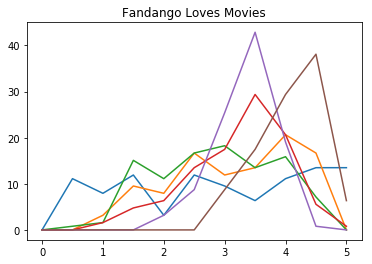

In [12]:
# Haciendo un plotind de prueba de los datos

plt.title('Fandango Loves Movies')
lis=np.arange(0,5.5,0.5)
fandango=plt.plot(lis, porcx[0,:], lis, porcx[1,:], lis, porcx[2,:],lis, porcx[3,:], lis, porcx[4,:], lis, porcx[5,:])

#fandango.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40%'])

In [13]:
import matplotlib.style as style
style.available

['seaborn-paper',
 'seaborn-deep',
 'Solarize_Light2',
 'seaborn-whitegrid',
 'seaborn-talk',
 'dark_background',
 'fast',
 'seaborn-muted',
 'seaborn',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-colorblind',
 'bmh',
 '_classic_test',
 'seaborn-dark',
 'fivethirtyeight',
 'seaborn-white',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-notebook',
 'ggplot',
 'seaborn-ticks',
 'seaborn-darkgrid',
 'classic',
 'seaborn-bright']

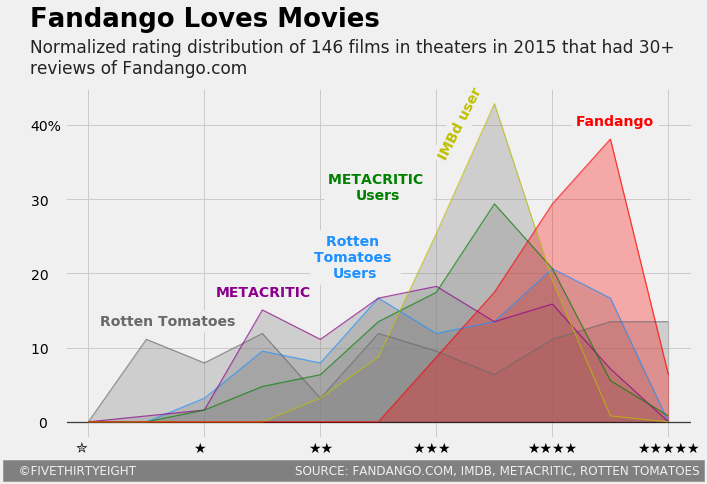

In [18]:
style.use('fivethirtyeight')   # El fondo coja todo el cuadro

fig=plt.figure(figsize=(10,6))
graph=fig.add_subplot(111)
# Adding a title and a subtitle


graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40%'])
# Generate a bolded horizontal line at y = 0 
graph.set_xticklabels(labels = [-10, '✮   ', '★  ', '★★'   , '★★★  ', '★★★★','★★★★★'])
graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
graph.set_xlim(left = -0.2, right = 5.2)

# The signature bar
graph.text(x = -0.7, y = -7,
    s = '   ©FIVETHIRTYEIGHT                                         SOURCE: FANDANGO.COM, IMDB, METACRITIC, ROTTEN TOMATOES',
    fontsize = 12, color = '#f0f0f0', backgroundcolor = 'grey')

graph.text(x=-0.5,y=53.3,s='Fandango Loves Movies',fontsize=26, weight = 'bold')
graph.text(x = -0.5, y = 47, 
               s = 'Normalized rating distribution of 146 films in theaters in 2015 that had 30+ \nreviews of Fandango.com ',
              fontsize = 17, alpha = .85)

# Add colored labels
graph.text(x = 4.2, y = 40, s = 'Fandango', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0',color='red')

graph.text(x = 3, y = 44, s = 'IMBd user', weight = 'bold', rotation = 63,
              backgroundcolor = '#f0f0f0',color='y')

graph.text(x = 1.1, y = 17, s = 'METACRITIC', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0',color='darkmagenta')

graph.text(x = 0.1, y = 13, s = 'Rotten Tomatoes', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0',color='dimgray')

graph.text(x = 2.3, y = 19.5, s = 'Rotten \nTomatoes \nUsers', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0',color='dodgerblue',horizontalalignment='center')

graph.text(x = 2.5, y = 30, s = 'METACRITIC \nUsers', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0',color='g',horizontalalignment='center')

#py_arrayd = [[0, 1, 1], [0, 0, 1],[0, 1, 1], [0, 0, 1],[0, 1, 1], [0, 0, 1]]

graph.fill_between(lis,0,porcx[0,:],color="gray",alpha=0.3)
graph.fill_between(lis,0,porcx[1,:],color="gray",alpha=0.3)
graph.fill_between(lis,0,porcx[2,:],color="gray",alpha=0.3)
graph.fill_between(lis,0,porcx[3,:],color="gray",alpha=0.3)
graph.fill_between(lis,0,porcx[4,:],color="gray",alpha=0.3)
graph.fill_between(lis,0,porcx[5,:],color="r",alpha=0.3)

#plt.plot(lis, porcx[0,:], lis, porcx[1,:], lis, porcx[2,:],lis, porcx[3,:], lis, porcx[4,:], lis, porcx[5,:],color=py_arrayd)
#plt.subplots_adjust(left=0.1,right=0.99,top=0.9,bottom=0.15)

plt.plot(lis, porcx[0,:],'dimgray',alpha=0.7,linewidth=1.2)
plt.plot(lis, porcx[1,:],'dodgerblue',alpha=0.7,linewidth=1.2)
plt.plot(lis, porcx[2,:],'darkmagenta',alpha=0.7,linewidth=1.2)
plt.plot(lis, porcx[3,:],'g',alpha=0.7,linewidth=1.2)
plt.plot(lis, porcx[4,:],'y',alpha=0.7,linewidth=1.2)
plt.plot(lis, porcx[5,:],'r',alpha=0.7,linewidth=1.2)

In [44]:
#help(plt.text)
#help(plt.figure)
#help(graph.fill_between)
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi